In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 지도 데이터 분석 라이브러리
import fiona
import geopandas

# 데이터 분석 라이브러리
import pandas as pd
import numpy as np
import os

# 데이터 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import style
import seaborn as sns
import folium
from folium.plugins import HeatMap

# 머신러닝 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer

In [5]:
# matplotlib 한글 지원 폰트 설정
plt.rc("font", family="Malgun Gothic")

In [6]:
sejong = geopandas.read_file('./dataset/전처리후/세종/merge_9.geojson', encoding='utf-8')
sejong = sejong[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

print(len(sejong))
sejong.head()

47396


,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((977800.00000 1828600.00000, 977800.0...",36.455719,127.251282,24.869,0,1,83.64,0.00,83.64,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((990100.00000 1837300.00000, 990100.0...",36.533877,127.387655,25.167,0,1,208.91,7.80,198.71,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((980600.00000 1843000.00000, 980600.0...",36.585083,127.282326,24.825,27,4,99.70,6.43,99.25,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((983800.00000 1830600.00000, 983800.0...",36.473686,127.317805,25.007,0,3,123.00,5.37,277.76,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((969300.00000 1857700.00000, 969300.0...",36.717142,127.157040,24.447,27,20,77.54,8.25,123.95,0,0,0,0,0,0,0,0,0,0


In [7]:
daegu = geopandas.read_file('./dataset/전처리후/대구/merge_9.geojson', encoding='utf-8')
daegu = daegu[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

print(len(daegu))
daegu.head()

134846


,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((1098300.00000 1762500.00000, 1098300...",35.861902,128.587298,28.786,124.0,18.0,473.52,9.97,452.73,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((1095800.00000 1760400.00000, 1095800...",35.843036,128.559580,28.763,298.0,47.0,215.99,8.83,213.95,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((1099700.00000 1760500.00000, 1099700...",35.843935,128.602820,28.865,173.0,6.0,263.28,19.39,1323.18,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((1096100.00000 1760200.00000, 1096100...",35.841240,128.562906,28.777,166.0,34.0,201.79,8.20,213.84,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((1099900.00000 1762300.00000, 1099900...",35.860105,128.605038,28.832,438.0,2.0,0.00,54.80,8614.43,0,0,0,0,0,0,0,0,0,0


In [8]:
daejeon = geopandas.read_file('./dataset/전처리후/대전/merge_9.geojson', encoding='utf-8')
daejeon = daejeon[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

print(len(daejeon))
daejeon.head()

92051


,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((992800.00000 1826000.00000, 992800.0...",36.432362,127.417591,25.355,77.0,8.0,107.63,10.78,1488.43,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((993300.00000 1822700.00000, 993300.0...",36.402716,127.423134,25.429,286.0,1.0,0.00,0.00,9653.28,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((992800.00000 1827500.00000, 992800.0...",36.445837,127.417591,25.335,81.0,18.0,147.06,7.18,172.82,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,678.61,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((993500.00000 1817300.00000, 993500.0...",36.354204,127.425352,25.501,32.0,3.0,160.56,14.55,7751.35,0,0,0,0,0,0,0,0,0,0


### data / target 분리

In [9]:
train_data = pd.concat([daegu[daegu.columns[1:-1]], daejeon[daejeon.columns[1:-1]]])
print(len(train_data))
train_data.head()

226897


,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설
0,35.861902,128.587298,28.786,124.0,18.0,473.52,9.97,452.73,0,0,0,0,0,0,0,0,0
1,35.843036,128.559580,28.763,298.0,47.0,215.99,8.83,213.95,0,0,0,0,0,0,0,0,0
2,35.843935,128.602820,28.865,173.0,6.0,263.28,19.39,1323.18,0,0,0,0,0,0,0,0,0
3,35.841240,128.562906,28.777,166.0,34.0,201.79,8.20,213.84,0,0,0,0,0,0,0,0,0
4,35.860105,128.605038,28.832,438.0,2.0,0.00,54.80,8614.43,0,0,0,0,0,0,0,0,0


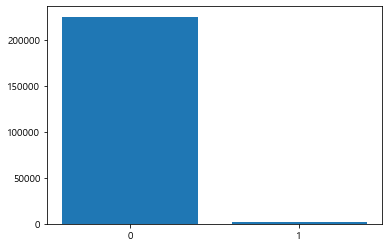

0    224937
1      1960
Name: EV, dtype: int64


In [10]:
train_target = pd.concat([daegu[daegu.columns[-1]], daejeon[daejeon.columns[-1]]])

plt.bar(train_target.unique(), train_target.value_counts())
plt.xticks([0, 1])
plt.show()
print(train_target.value_counts())

In [11]:
test_data = sejong[sejong.columns[1:-1]]
test_target = sejong[sejong.columns[-1]]

### 모델 비교

### RandomForest

In [3]:
def RandomForest(dists, train_data, train_target, test_data, test_target):
    clf = GridSearchCV(
        ensemble.RandomForestClassifier(),
        param_grid=dists, # 파라미터 입력
        scoring='f1',  # 오차 평가방법
        verbose=1,     # 진행상황
        n_jobs=4
      )

    clf.fit(train_data, train_target)
    
    print()
    print('best_params :', clf.best_params_)
    print('best_score :', clf.best_score_)
    print()
    
    pred = clf.predict(test_data)

    temp = sejong.copy()
    temp['pred'] = [0]*len(temp)
    for i, idx in enumerate(test_data.index):
        temp['pred'][idx] = pred[i]
    #temp['pred'] = pred
        
    print('실제 충전소 수 :', len(temp[temp['EV']==1]))
    print('충전소가 있어야 한다고 분류한 타일 수 :', len(temp[temp['pred']==1]))
    print('recall score(True Positive) 실제 충전소가 맞는 지 맞춘 경우 :', len(temp[(temp['pred']==1) & (temp['EV']==1)]), '/', len(temp[temp['EV']==1]))
    print('최적 입지 후보 :', len(temp[(temp['pred']==1) & (temp['EV']==0)]), '/', len(temp[temp['EV']==0]))
    
    idx = temp[(temp['EV'] == 0) & (temp['pred'] == 1)].index
    for i in temp[temp['pred'] == 1].index:
        temp['pred'].loc[i] = 0
    for i in idx:
        temp['pred'].loc[i] = 1

    fig, ax1 = plt.subplots(figsize=(15, 15))
    fig.set_facecolor('white')

    sejong['geometry'].plot(ax=ax1, color='gainsboro')
    sejong[sejong['EV']==1].plot(ax=ax1, column='EV', color='lime', aspect=1)
    temp[temp['pred']==1].plot(ax=ax1, column='pred', color='red', aspect=1)
    ax1.set_axis_off()
    plt.show()

Fitting 5 folds for each of 192 candidates, totalling 960 fits
best_params : {'max_depth': 100, 'max_features': 14, 'n_estimators': 10}
best_score : 0.03502863872627778
실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 6
recall score(True Positive) 실제 충전소가 맞는 지 맞춘 경우 : 0 / 276
최적 입지 후보 : 6 / 47120


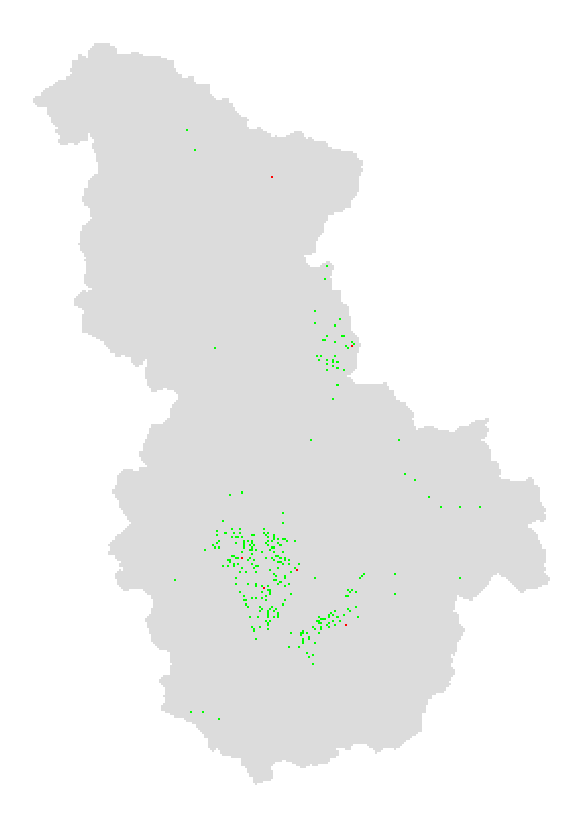

In [13]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,14], 
    'n_estimators' : [10,20,30,50],
    #'class_weight' : [{0:1.3, 1:8.7}]
}

RandomForest(dists, train_data, train_target, test_data, test_target)

#### TP가 0으로 기존 충전소를 제대로 분류하지 못함.

### 정규화

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sejong_minmax = scaler.fit_transform(sejong[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
sejong_minmax = pd.DataFrame(sejong_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
sejong[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = sejong_minmax

sejong.head()

,geometry,lat,lng,고저차,인구수,건축물수,주거용도면적,건축물높이,건축물연면적,주차장수,교육연구시설,주거지,농축산업시설,창고시설,편의시설,생산시설,님비시설,자동차관련시설,EV
0,"POLYGON ((977800.00000 1828600.00000, 977800.0...",36.455719,127.251282,0.551724,0.00000,0.014706,0.090746,0.000000,0.000854,0,0,0,0,0,0,0,0,0,0
1,"POLYGON ((990100.00000 1837300.00000, 990100.0...",36.533877,127.387655,0.894253,0.00000,0.014706,0.226660,0.064580,0.002029,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((980600.00000 1843000.00000, 980600.0...",36.585083,127.282326,0.501149,0.01176,0.058824,0.108171,0.053237,0.001014,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((983800.00000 1830600.00000, 983800.0...",36.473686,127.317805,0.710345,0.00000,0.044118,0.133451,0.044461,0.002836,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((969300.00000 1857700.00000, 969300.0...",36.717142,127.157040,0.066667,0.01176,0.294118,0.084128,0.068306,0.001266,0,0,0,0,0,0,0,0,0,0


In [16]:
daegu_minmax = scaler.fit_transform(daegu[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
daegu_minmax = pd.DataFrame(daegu_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
daegu[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = daegu_minmax

daejeon_minmax = scaler.fit_transform(daejeon[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
daejeon_minmax = pd.DataFrame(daejeon_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
daejeon[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = daejeon_minmax

In [31]:
train_data = pd.concat([daegu[daegu.columns[1:-1]], daejeon[daejeon.columns[1:-1]]])
train_target = pd.concat([daegu[daegu.columns[-1]], daejeon[daejeon.columns[-1]]])

test_data = sejong[sejong.columns[1:-1]]
test_target = sejong[sejong.columns[-1]]

Fitting 5 folds for each of 192 candidates, totalling 960 fits
best_params : {'max_depth': 50, 'max_features': 9, 'n_estimators': 50}
best_score : 0.03513281168317435
실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 36
recall score(True Positive) 실제 충전소가 맞는 지 맞춘 경우 : 1 / 276
최적 입지 후보 : 35 / 47120


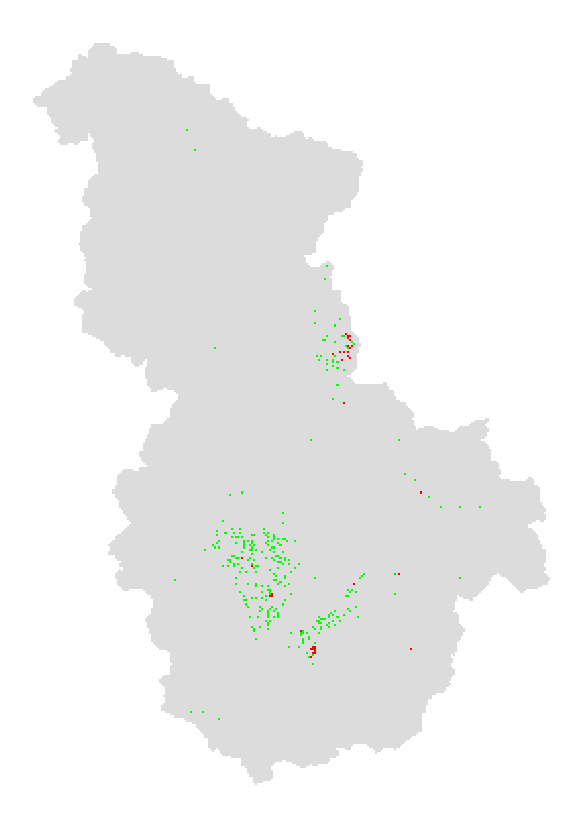

In [18]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,14], 
    'n_estimators' : [10,20,30,50],
    #'class_weight' : [{0:1.3, 1:8.7}]
}

RandomForest(dists, train_data, train_target, test_data, test_target)

### 언더샘플링

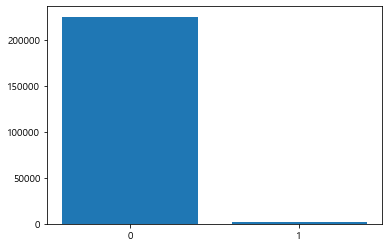

In [33]:
plt.bar([0, 1], train_target.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()

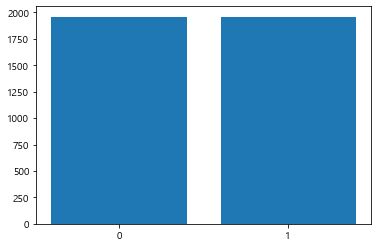

In [34]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
train_data, train_target = rus.fit_resample(train_data, train_target)
#train_data = pd.DataFrame(data, columns=data.columns)
plt.bar([0, 1], train_target.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()

Fitting 5 folds for each of 192 candidates, totalling 960 fits

best_params : {'max_depth': 3, 'max_features': 3, 'n_estimators': 10}
best_score : 0.6550261555424701

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 17913
recall score(True Positive) 실제 충전소가 맞는 지 맞춘 경우 : 194 / 276
최적 입지 후보 : 17719 / 47120


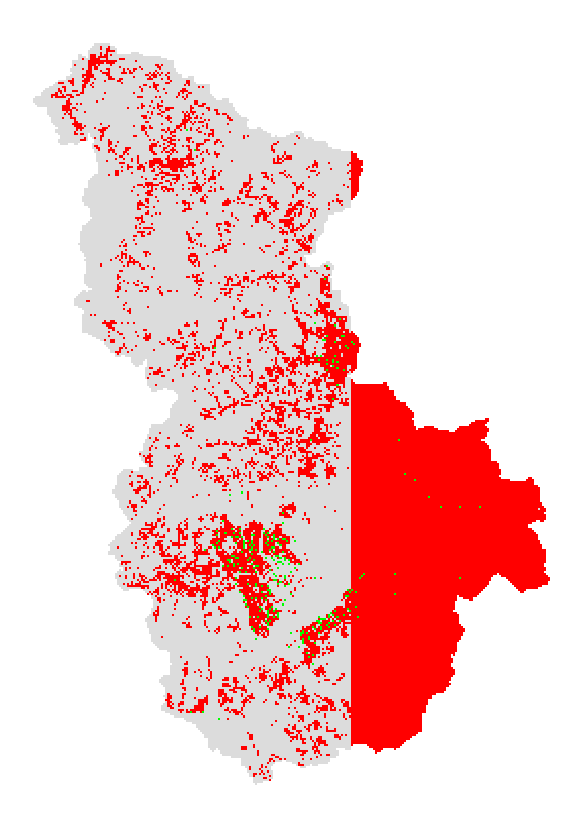

In [35]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,14], 
    'n_estimators' : [10,20,30,50],
    #'class_weight' : [{0:1.3, 1:8.7}]
}

RandomForest(dists, train_data, train_target, test_data, test_target)

### 오버샘플링

In [37]:
train_data = pd.concat([daegu[daegu.columns[1:-1]], daejeon[daejeon.columns[1:-1]]])
train_target = pd.concat([daegu[daegu.columns[-1]], daejeon[daejeon.columns[-1]]])

test_data = sejong[sejong.columns[1:-1]]
test_target = sejong[sejong.columns[-1]]

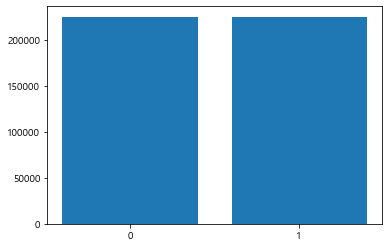

In [38]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
train_data, train_target = ros.fit_resample(train_data, train_target)
#train_data = pd.DataFrame(data, columns=data.columns)
plt.bar([0, 1], train_target.value_counts())
plt.xticks([0, 1], label=[0,1])
plt.show()

Fitting 5 folds for each of 192 candidates, totalling 960 fits

best_params : {'max_depth': 50, 'max_features': 3, 'n_estimators': 10}
best_score : 0.907074293305263

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 0
recall score(True Positive) 실제 충전소가 맞는 지 맞춘 경우 : 0 / 276
최적 입지 후보 : 0 / 47120


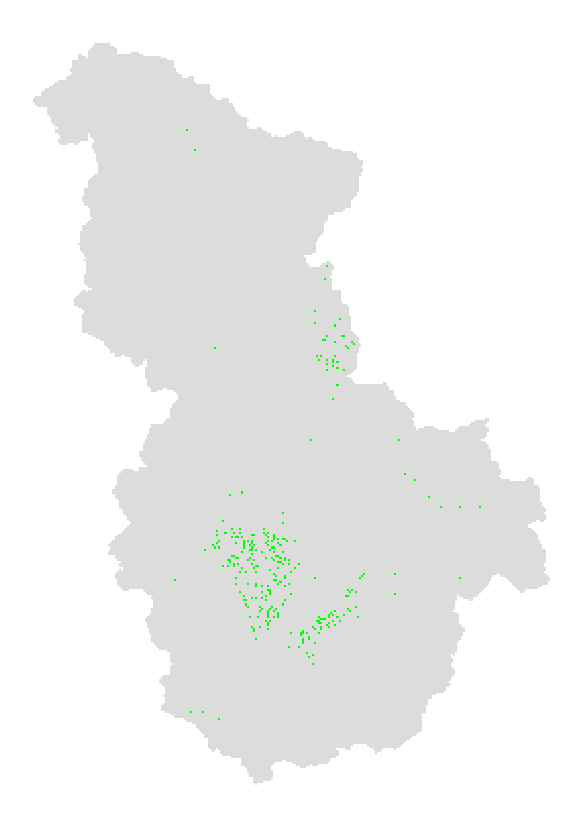

In [39]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,14], 
    'n_estimators' : [10,20,30,50],
    #'class_weight' : [{0:1.3, 1:8.7}]
}

RandomForest(dists, train_data, train_target, test_data, test_target)

In [137]:
sejong = geopandas.read_file('./dataset/전처리후/세종/merge_9.geojson', encoding='utf-8')
sejong = sejong[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

daegu = geopandas.read_file('./dataset/전처리후/대구/merge_9.geojson', encoding='utf-8')
daegu = daegu[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

daejeon = geopandas.read_file('./dataset/전처리후/대전/merge_9.geojson', encoding='utf-8')
daejeon = daejeon[['geometry', 'lat', 'lng', '고저차', '인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '주차장수', '교육연구시설', '주거지', '농축산업시설', '창고시설',
       '편의시설', '생산시설', '님비시설', '자동차관련시설', 'EV']]

In [138]:
print('세종시 데이터 수 :', len(sejong))
print('세종시 인구수=0인 타일:', len(sejong[sejong['인구수']==0]), end='\n\n')

print('대전시 데이터 수 :', len(daejeon))
print('대전시 인구수=0인 타일:', len(daejeon[daejeon['인구수']==0]), end='\n\n')

print('대구시 데이터 수 :', len(daegu))
print('대구시 인구수=0인 타일:', len(daegu[daegu['인구수']==0]))

세종시 데이터 수 : 47396
세종시 인구수=0인 타일: 44133

대전시 데이터 수 : 92051
대전시 인구수=0인 타일: 80412

대구시 데이터 수 : 134846
대구시 인구수=0인 타일: 116303


In [139]:
scaler = MinMaxScaler()

sejong_minmax = scaler.fit_transform(sejong[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
sejong_minmax = pd.DataFrame(sejong_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
sejong_cut[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = sejong_minmax

daegu_minmax = scaler.fit_transform(daegu[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
daegu_minmax = pd.DataFrame(daegu_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
daegu[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = daegu_minmax

daejeon_minmax = scaler.fit_transform(daejeon[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']])
daejeon_minmax = pd.DataFrame(daejeon_minmax, columns=['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차'])
daejeon[['인구수', '건축물수', '주거용도면적', '건축물높이', '건축물연면적', '고저차']] = daejeon_minmax

In [140]:
sejong_cut = sejong[sejong['인구수']!=0]
daegu_cut = daegu[daegu['인구수']!=0]
daejeon_cut = daejeon[daejeon['인구수']!=0]

sejong_cut.reset_index(drop=True, inplace=True)
daejeon_cut.reset_index(drop=True, inplace=True)
daegu_cut.reset_index(drop=True, inplace=True)

train_data = pd.concat([daegu_cut[daegu_cut.columns[1:-1]], daejeon_cut[daejeon_cut.columns[1:-1]]])
train_target = pd.concat([daegu_cut[daegu_cut.columns[-1]], daejeon_cut[daejeon_cut.columns[-1]]])

test_data = sejong_cut[sejong_cut.columns[1:-1]]
test_target = sejong_cut[sejong_cut.columns[-1]]

In [142]:
test_data.set_index(sejong[sejong['인구수']!=0].index, inplace=True)

Fitting 5 folds for each of 192 candidates, totalling 960 fits

best_params : {'max_depth': 50, 'max_features': 14, 'n_estimators': 10}
best_score : 0.01216812565726606

실제 충전소 수 : 276
충전소가 있어야 한다고 분류한 타일 수 : 18
recall score(True Positive) 실제 충전소가 맞는 지 맞춘 경우 : 0 / 276
최적 입지 후보 : 18 / 47120


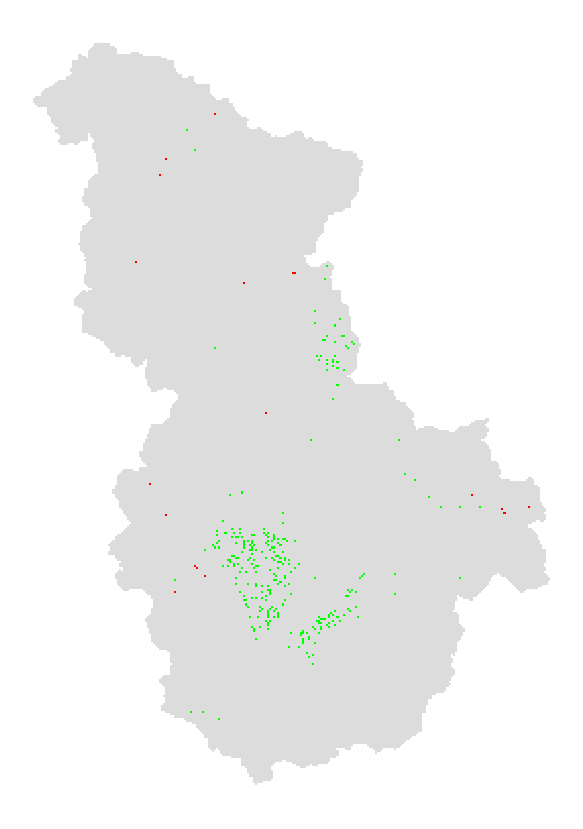

In [146]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,14], 
    'n_estimators' : [10,20,30,50],
    #'class_weight' : [{0:1.3, 1:8.7}]
}

RandomForest(dists, train_data, train_target, test_data, test_target)

In [77]:
material = pd.read_csv('통합final.csv', encoding='cp949')
material.rename(columns={'정류장 갯수':'EV'}, inplace=True)

import shapely.wkt
sejong = material.copy()
P = []
for s in sejong['geometry']:
    P.append(shapely.wkt.loads(s))
sejong['geometry'] = P
sejong = geopandas.GeoDataFrame(sejong, geometry=P)

In [78]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(material[material.columns[:-1]], material[material.columns[-1]])

In [79]:
idx = []
dt = list(data_train['geometry'])
mt = list(material['geometry'])
for i in range(len(target_test)):
    idx.append(mt.index(dt[i]))

In [80]:
data_test['idx'] = idx
data_test.set_index(['idx'], inplace=True)

In [81]:
data_train = data_train[data_train.columns[1:]]
data_test = data_test[data_test.columns[1:]]

In [84]:
len([sejong['EV']==1])

99

Fitting 5 folds for each of 192 candidates, totalling 960 fits

best_params : {'max_depth': 3, 'max_features': 3, 'n_estimators': 10}
best_score : nan

실제 충전소 수 : 99
충전소가 있어야 한다고 분류한 타일 수 : 0
recall score(True Positive) 실제 충전소가 맞는 지 맞춘 경우 : 0 / 99
최적 입지 후보 : 0 / 47288


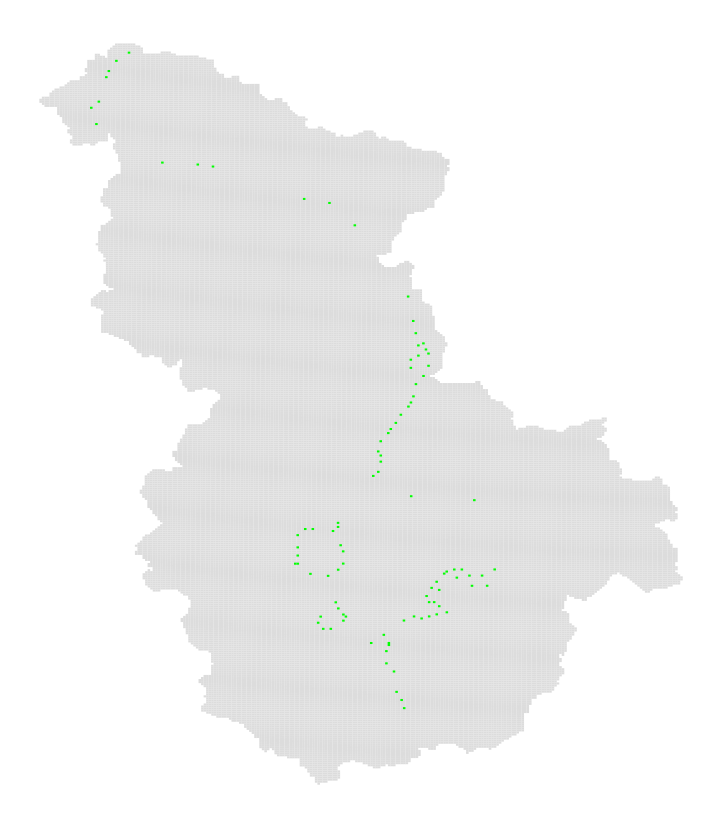

In [83]:
dists = {
    'max_depth' : [3,5,10,15,20,30,50,100],
    'max_features' : [3,5,7,9,11,14], 
    'n_estimators' : [10,20,30,50],
    #'class_weight' : [{0:1.3, 1:8.7}]
}

RandomForest(dists, data_train, target_train, data_test, target_test)

In [ ]:
0 삭제 -> 정규화 -> class_weight
정규화 -> 0삭제 -> class_weight
auroc, clustering

In [ ]:
xgb, light gbm, catboost, auroc